## Install Spark

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/u

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [ ]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

# Downloading and preprocessing Chicago's Reported Crime Data

In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2020-07-24 22:07:32--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [<=>                 ]   1.57G  3.21MB/s    in 8m 46s  

2020-07-24 22:16:19 (3.06 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1688220960]



In [ ]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
!mv 'rows.csv?accessType=DOWNLOAD' 'reported-crimes.csv'

In [ ]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [ ]:
# Schema
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



## **Working with Columns**


In [ ]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



In [ ]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|1153|
|0281|
|0620|
|0810|
|0281|
+----+
only showing top 5 rows



In [ ]:
rc.select('Case Number', 'Date', 'Arrest').show(5)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   JA366925|2001-01-01 11:00:00| false|
|   JB147188|2017-10-08 03:00:00| false|
|   JB147595|2017-03-28 14:00:00| false|
|   JB147230|2017-09-09 20:17:00| false|
|   JB147599|2017-08-26 10:00:00| false|
+-----------+-------------------+------+
only showing top 5 rows



In [ ]:
# Adding constant numbers to columns using literals
from pyspark.sql.functions import lit

In [ ]:
# adding a column named one with all ones
rc.withColumn('One', lit(1)).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|         

In [ ]:
# Remove column IUCR
rc = rc.drop('IUCR')
rc.show()

+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|    

## **Working with Rows**

### **Add the reported crimes for an additional day 12-Nov-2018, to our dataset**

In [ ]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

3

In [ ]:
one_day.show()

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [ ]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  45789|
|CRIMINAL SEXUAL A...|    463|
|            STALKING|   3384|
|PUBLIC PEACE VIOL...|  47785|
|           OBSCENITY|    583|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  11156|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14422|
|   CRIMINAL TRESPASS| 193370|
|             ASSAULT| 418507|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14067|
| MOTOR VEHICLE THEFT| 314133|
|               THEFT|1418428|
|             BATTERY|1232220|
|             ROBBERY| 255599|
|            HOMICIDE|   9466|
|           RITUALISM|     23|
|    PUBLIC INDECENCY|    161|
+--------------------+-------+
only showing top 20 rows



In [ ]:
rc.groupBy('Primary Type').count().orderBy('count').show(10)

+--------------------+-----+
|        Primary Type|count|
+--------------------+-----+
|   DOMESTIC VIOLENCE|    1|
|NON-CRIMINAL (SUB...|    9|
|           RITUALISM|   23|
|      NON - CRIMINAL|   38|
|   HUMAN TRAFFICKING|   49|
|OTHER NARCOTIC VI...|  124|
|    PUBLIC INDECENCY|  161|
|        NON-CRIMINAL|  164|
|CONCEALED CARRY L...|  283|
|CRIMINAL SEXUAL A...|  463|
+--------------------+-----+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import col, size

(rc.filter(rc.Arrest == True).count()/rc.count())*100

27.753898050585995

In [ ]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770568|
|           RESIDENCE|1144774|
|           APARTMENT| 698231|
+--------------------+-------+
only showing top 3 rows



In [ ]:
rc.count()

6753055

## **String Functions**

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
# Display the primary type column in lower and upper characters and the first 4 characters of the column
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
|           burglary|           BURGLARY|                         BURG|
|              theft|              THEFT|                         THEF|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [ ]:
# show the most recent date and oldest date
from pyspark.sql.functions import min, max
rc.select(min(col('Date')), max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



### **Three days earlier than last date and three days later than first date**


In [ ]:
from pyspark.sql.functions import date_add, date_sub
rc.select(date_add(min(col('Date')), 3), date_sub(max(col('Date')), 3)).show(1) 

+----------------------+----------------------+
|date_add(min(Date), 3)|date_sub(max(Date), 3)|
+----------------------+----------------------+
|            2001-01-04|            2018-11-07|
+----------------------+----------------------+



## **Working with Dates**

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show()

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



In [ ]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)] ,['Christmas'])
df.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [ ]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show()

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-12-25|                                2019-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [ ]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
nrc = spark.read.csv('reported-crimes.csv', header=True)
nrc.show(5, truncate=False)

+--------+-----------+----------------------+--------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block               |IUCR|Primary Type       |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+--------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11034701|JA366925   |01/01/2001 11:00:00 AM|016XX E 86TH PL     |1153|DECEPTIVE PRACTICE |FINANCIAL IDENTITY THEFT OVER $ 300|RES

## **Join Functions**

In [ ]:
# Download chicago police station data

!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-07-24 23:23:21--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-07-24 23:23:22 (499 MB/s) - ‘police-station.csv’ saved [5699]

total 1869272
-rw-r--r--  1 root root       5699 Aug 19  2019 police-station.csv
-rw-r--r--  1 root root 1688220960 Jul 24 11:09 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Jul 10 16:29 sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz
drwxr-xr-x  2 root root       4096 Jul 24 22:16 spark-warehouse


In [ ]:
ps = spark.read.csv('police-station.csv', header=True)
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.858

#### The reported crimes dataset has only the distict number. Add the distric name by joining with police station dataset

In [ ]:
rc.cache()
rc.count()

6753055

In [ ]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [ ]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



In [ ]:
# padding the ps dataframe district column
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [ ]:
ps.select(lpad(col('DISTRICT'), 3,'0')).distinct().show(30)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 009|
|                 012|
|                 024|
|                 Hea|
|                 015|
|                 006|
|                 019|
|                 020|
|                 011|
|                 025|
|                 003|
|                 005|
|                 016|
|                 018|
|                 008|
|                 022|
|                 001|
|                 014|
|                 010|
|                 004|
|                 017|
|                 ",C|
|                 007|
|                 002|
+--------------------+



In [ ]:
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'), 3, '0'))
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745

In [ ]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show(10)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+-----------+----------

In [ ]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [ ]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district'
    
).show(truncate=False)

+--------+-----------+-------------------+-------------------------+----+--------------------------+-----------------------------------+------------------------------+------+--------+----+--------+----+--------------+--------+----+----------------------+--------+--------------+
|ID      |Case Number|Date               |Block                    |IUCR|Primary Type              |Description                        |Location Description          |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|Updated On            |DISTRICT|DISTRICT NAME |
+--------+-----------+-------------------+-------------------------+----+--------------------------+-----------------------------------+------------------------------+------+--------+----+--------+----+--------------+--------+----+----------------------+--------+--------------+
|11034701|JA366925   |2001-01-01 11:00:00|016XX E 86TH PL          |1153|DECEPTIVE PRACTICE        |FINANCIAL IDENTITY THEFT OVER $ 300|RESIDENCE                  

In [ ]:
rc.count()

6753055

In [ ]:
rc.select(col('Primary Type')).distinct().orderBy('Primary Type').show(35, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
rc.filter((col('Primary Type') == 'NON - CRIMINAL')|(col('Primary Type') == 'NON-CRIMINAL')|(col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)')).groupBy('Description').count().orderBy('count', ascending=False).show(10, truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [ ]:
from pyspark.sql.functions import dayofweek

In [ ]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [ ]:
(rc.groupBy('Date').count().orderBy('count', ascending=False)).select('Date').show(5)

+-------------------+
|               Date|
+-------------------+
|2008-01-01 00:01:00|
|2007-01-01 00:01:00|
|2006-01-01 00:01:00|
|2004-01-01 00:00:00|
|2003-01-01 00:01:00|
+-------------------+
only showing top 5 rows



In [ ]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [ ]:
# to get the name of the day instead of number for a day
from pyspark.sql.functions import date_format

In [ ]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [ ]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [ ]:
rc.groupby(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show(5)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1016928|
|                 Wed| 973852|
|                 Tue| 968010|
|                 Sat| 965150|
|                 Thu| 964508|
+--------------------+-------+
only showing top 5 rows



In [ ]:
# collect them to access row objects for plotting
rc.groupby(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911912),
 Row(date_format(Date, E)='Mon', count=952695),
 Row(date_format(Date, E)='Thu', count=964508),
 Row(date_format(Date, E)='Sat', count=965150),
 Row(date_format(Date, E)='Wed', count=973852),
 Row(date_format(Date, E)='Tue', count=968010),
 Row(date_format(Date, E)='Fri', count=1016928)]

In [ ]:
dow = [x[0] for x in rc.groupby(date_format(col('Date'), 'E')).count().collect()]

In [ ]:
cnt = [x[1] for x in rc.groupby(date_format(col('Date'), 'E')).count().collect()]

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
cp = pd.DataFrame({'Day_of_week': dow, 'Count': cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,911912
1,Mon,952695
2,Thu,964508
3,Sat,965150
4,Wed,973852
5,Tue,968010
6,Fri,1016928


<Figure size 720x576 with 0 Axes>

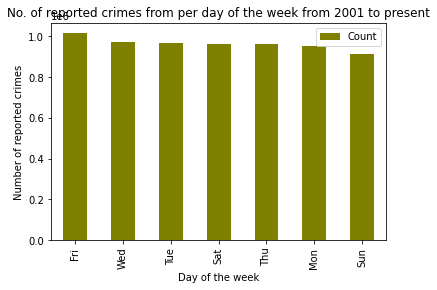

In [ ]:
plt.figure(figsize=(10,8))
cp.sort_values('Count', ascending=False).plot(kind='bar',color='olive', x='Day_of_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('Number of reported crimes')
plt.title('No. of reported crimes from per day of the week from 2001 to present');